# Import and plot all the fit parameters vs temperature

In [197]:
%run functions_for_ESR_data_processing.ipynb
%matplotlib inline

compound = 'Na'

if compound == 'Li':
    folder = "C:\\Users\\F25_1.307_b\\Box Sync\\Klingeler_Masterarbeit\\howardevansite\\LiCuFe2(VO4)3 powder\\X-band\\21_02_2019"
else:
    folder = "C:\\Users\\F25_1.307_b\\Box Sync\\Klingeler_Masterarbeit\\howardevansite\\NaCuFe2(VO4)3 powder\\X-band\\19_02_2019"
    
filename = folder+'\\python fits\\python_fit_results_single_Lor_phase_mixing.txt'




# list of the names of all the files in "folder" 
# files with different endings (.DTA, .dat, DSC, ...) all only appear once
files = [i[:-4] for i in os.listdir(folder) if i[-3:] == 'dat']

# extracts the temperature from the filename
# argument is just name of the file
def temperature (name):
    start = name.find('_')
    end = name.find('K')
    
    temp = name[start+1:end]
    if temp.find('p') == -1:
        temp_new = temp
    else:
        middle = temp.find('p')
        temp_new = temp[:middle] + '.' + temp[middle+1:]
    temp_new = str("%.1f" % float(temp_new))
    return temp_new+' K'
    

# extracts the freqeuncy from the .DSC file
# argument needs to be filename of .DSC file (icluding full path and .DSC ending)
def frequency (filename):
    f = open (filename, 'r')
    for line in f:
        if line[0:9] == 'Frequency':
            line = line.strip()
            line = line.split()
            frequency = line[1] + ' ' + line[2]
    return frequency


# none of the following important for any of the following procedure but makes it easier accessing individual files

# this routine sorts the filenames in "files" according to their temperatures
# and gives an array "temperatures" with the ordered temperatures
temperatures = []
for name in files:
    temp_new = temperature(name)[:-2]    
    temperatures.append(float(temp_new))

temperatures = np.array(temperatures)
files = np.array(files)

files = files[temperatures.argsort()]
temperatures = sorted(temperatures)




if compound == 'Li':
    #T, B01, dB01, gamma1, dgamma1, A1, dA1, B02, dB02, gamma2, dgamma2, A2, dA2, l, dl, m, dm, n, dn, freq = data_import(filename, 3)
    T, B01, dB01, gamma1, dgamma1, A1, dA1, l, dl, m, dm, n, dn, freq, mixing_angle, dangle = data_import(filename, 3)
else:
    #T, B01, dB01, gamma1, dgamma1, A1, dA1, B02, dB02, gamma2, dgamma2, A2, dA2, B03, dB03, gamma3, dgamma3, A3, dA3, l, dl, m, dm, n, dn, freq = data_import(filename, 3)
    T, B01, dB01, gamma1, dgamma1, A1, dA1, l, dl, m, dm, n, dn, freq, mixing_angle, dangle = data_import(filename, 3)


Tone, B0, dB0, gamma, dgamma, A, dA, l0, dl0, m0, dm0, n0, dn0, freq0 = data_import(folder+'\\python fits\\initialguess.txt', 3)



# Plot of the fit parameters as a fct of temperature

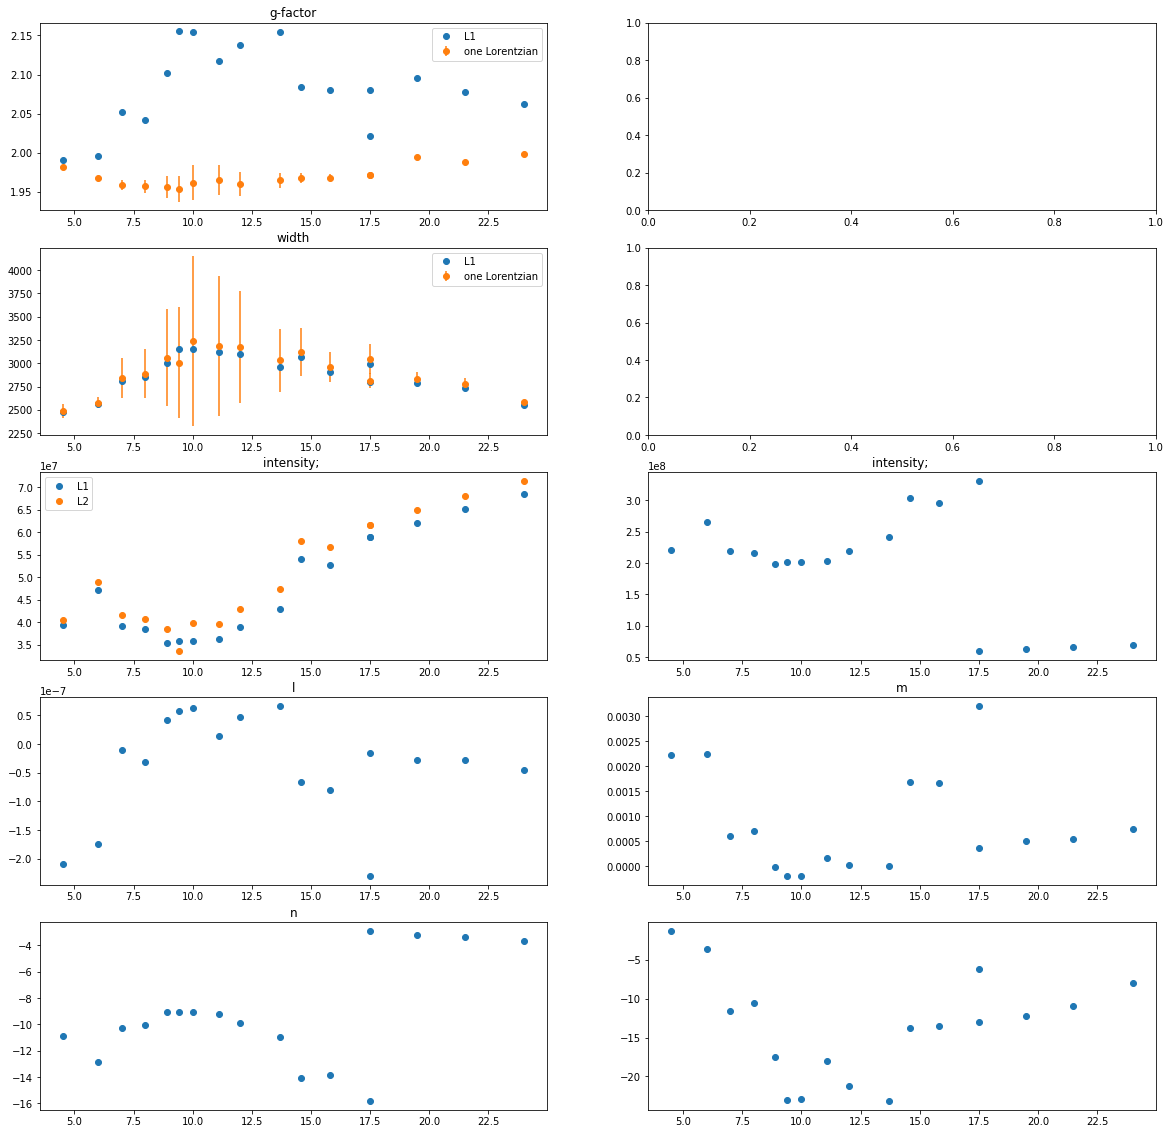

In [198]:
###################################################################################################
###################################################################################################
lower_limit = 0
upper_limit = 25

# do you only want to show temperatures in the range between lower and upper limit?: cut 'no'
# do you want to show all temperatures except the ones between lower and upper limit?: cut = 'yes'
cut = 'no'
###################################################################################################
###################################################################################################


if cut == 'no':
    mask = [all( [(lower_limit<T)[i], (T<upper_limit)[i]] ) for i in np.arange(len(T)) ]
elif cut == 'yes': 
    mask = [any( [(lower_limit>T)[i], (T>upper_limit)[i]] ) for i in np.arange(len(T)) ]
else:
    raise Exception('The only two possible options for "cut" are "yes" or "no"! You entered: "{}"'.format(cut))

#mask = n>-25

fig, axes = plt.subplots(5, 2, sharex=False, sharey=False, figsize=(20,20))

g1, g_err1 = [10000*freq/B01/13.98, 10000*freq*dB01/B01/B01/13.98]
#g2, g_err2 = [10000*freq/B02/13.98, 10000*freq*dB02/B02/B02/13.98]
g, g_err = [10000*freq0/B0/13.98, 10000*freq0*dB0/B0/B0/13.98]

axes[0,0].set_title('g-factor')
axes[0,0].errorbar(T[mask], g1[mask], fmt = 'o')
#axes[0,0].errorbar([T[index]], [g1[index]], fmt = 'o')
axes[0,0].errorbar(Tone[mask], g[mask], yerr = g_err[mask], fmt='o')
axes[0,0].legend(['L1', 'one Lorentzian'])
#axes[0,0].set_ylim(1.94,2.03)

#axes[0,1].errorbar(T[mask], g2[mask], fmt = 'o')
#axes[0,1].errorbar([T[index]], [g2[index]], fmt = 'o')




data1 = np.array([gamma1, dgamma1])
#data2 = np.array([gamma2, dgamma2])
data3 = np.array([gamma, dgamma])

axes[1,0].set_title('width')
axes[1,0].errorbar(T[mask], data1[0, mask], fmt='o')
#axes[1,0].errorbar([T[index]], [data1[0,index]], fmt = 'o')
axes[1,0].errorbar(T[mask], data3[0, mask], yerr = data3[1, mask], fmt='o')
axes[1,0].legend(['L1', 'one Lorentzian'])

#axes[1,1].errorbar(T[mask], data2[0, mask], fmt='o')
#axes[1,1].errorbar([T[index]], [data2[0,index]], fmt = 'o')

#axes[1].legend(['1st peak', '2nd peak', '3rd peak', 'single Lorentzian'])




data1, err1 = rescale_A( A1, dA1, compound )
#data2, err2 = rescale_A_Na( A2, dA2 )
data3, err3 = rescale_A( A, dA, compound )


axes[2,0].set_title('intensity; ') # + str(A1[13]/A1[14]) + '    ' + str(A2[13]/A2[14]))
axes[2,0].errorbar(T[mask], data1[mask], fmt='o')
#axes[2,0].errorbar(T[mask], data2[mask], fmt='o')
axes[2,0].errorbar(T[mask], data3[mask], fmt='o')
#axes[2,0].errorbar([T[index]], [data1[index]], fmt = 'o')
#axes[2,0].errorbar([T[index]], [data2[index]], fmt = 'o')
axes[2,0].legend(['L1', 'L2', 'one Lorentzian'])

axes[2,1].set_title('intensity; ') # + str(A1[34]/A1[35]) + '    ' + str(A2[34]/A2[35]))
axes[2,1].errorbar(T[mask], A1[mask], yerr = dA1[mask], fmt='o')
#axes[2,1].errorbar(T[mask], A2[mask], yerr = dA2[mask], fmt='o')
#axes[2,1].errorbar([T[index]], [A1[index]], fmt = 'o')
#axes[2,1].errorbar([T[index]], [A2[index]], fmt = 'o')
#axes[2].legend(['1st peak', '2nd peak', '3rd peak', 'single Lorentzian'])



axes[3,0].set_title('l')
axes[3,0].errorbar(T[mask], l[mask], yerr = dl[mask], fmt='o')

axes[3,1].set_title('m')
axes[3,1].errorbar(T[mask], m[mask], yerr = dm[mask], fmt='o')

axes[4,0].set_title('n')
axes[4,0].errorbar(T[mask], n[mask], yerr = dn[mask], fmt='o')


#data1, err1 = rescale_A_Na( A3, dA3 )
#data1, err1 = np.array([10000*freq/B03/13.98, 10000*freq*dB03/B03/B03/13.98])
#data1, err1 = np.array([A3, dA3])
#data1, err1 = np.array([gamma3, dgamma3])
#axes[4,1].errorbar(T[mask], data1[mask], yerr = err1[mask], fmt='o')

axes[4,1].errorbar(T[mask], mixing_angle[mask], fmt='o')

plt.show()

# Plot individual data sets at certain temperatures

T = 215.0 K
file = NaCuFe2_215K_new
l = -2.5948490682147342e-08
m = 0.0002991876832146484
n = -1.0547474932250243


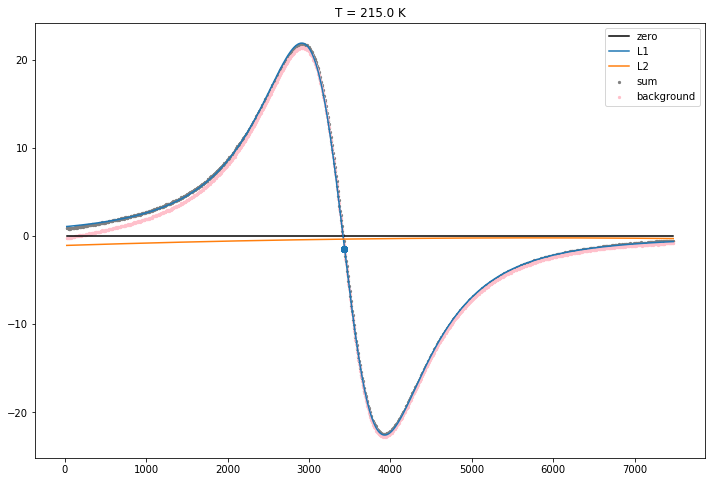

In [202]:
temp = 4
index = np.arange(len(T))[ (abs(T-temp)-min(abs(T-temp))) < 0.01 ][0]
index = 47

field, amp = data_import(folder+'\\'+files[index]+'_processed.txt', 3)

d1 = one_Lor_derivative_w_phase(field, B01[index], A1[index], gamma1[index], mixing_angle[index])
#d2 = one_Lor(field, B02[index], A2[index], gamma2[index])
#d3 = one_Lor(field, B03[index], A3[index], gamma3[index])
#dsum = d1 + d2 #+ d3
data = amp -(l[index]*field**2+m[index]*field+n[index])

fig, axes = plt.subplots(1, 1, figsize=(12,8))

axes.plot(field, np.zeros(len(field)), c = 'black')

axes.plot(field, d1)
#axes.plot(field, d2)
#xes.plot(field, d3)
#axes.plot(field, dsum)
axes.plot(field, l[index]*field**2 + m[index]*field + n[index])

axes.scatter(field, data, s=5, c = 'gray')
axes.scatter(field, amp, s=5, c = 'pink')

axes.legend(['zero', 'L1', 'L2', 'sum', 'background', 'data', 'raw data'])

axes.set_title('T = '+str(T[index])+' K')

print ('T = '+str(T[index])+' K\nfile = '+files[index] + '\nl = '+str(l[index]) + 
       '\nm = '+str(m[index]) + '\nn = '+str(n[index]))

#data = [field/10000, data, dsum, d1, d2]        
#names = ['field', 'raw data', 'sum of individual fits', 'fit 1', 'fit 2']
#units = ['T', '', '', '', '']
#comments = [str(T[index])+' K', str(T[index])+' K', str(T[index])+' K', str(T[index])+' K', str(T[index])+' K']

#save(data, names, units, comments, folder+'\\individual_fit_curves\\individual_fit_curves_'+str(T[index])+'_K.txt' )


interpolated = interp1d(field, amp)
B = np.linspace(1000,6000,100000)
interpolated_data = interpolated(B)
    
maxy = max(interpolated_data)
miny = min(interpolated_data)
maxx = B[(interpolated_data-maxy)>-1e-10][0]
minx = B[(interpolated_data-miny)<1e-10][0]
    
px = (maxx + minx)/2
py = float(interpolated(px))

plt.scatter(np.ones(20)*px, np.ones(20)*py)

# Individually fit single data sets

Text(0.5,1,'T = 10.0 K')

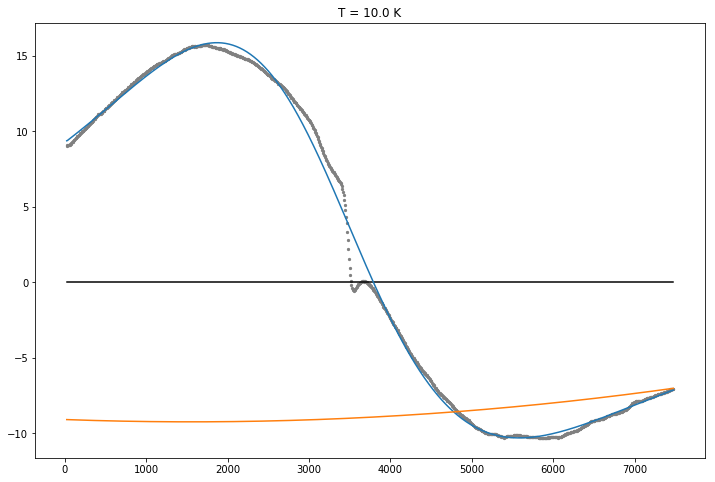

In [190]:
%run functions_for_ESR_data_processing.ipynb
temp = 4
index = np.arange(len(T))[ (abs(T-temp)-min(abs(T-temp))) < 0.01 ][0]
index = 6

field, amp = data_import(folder+'\\'+files[index]+'_processed.txt', 3)

upper_limit = 30000
lower_limit = 0
if upper_limit > lower_limit:
    mask = [all( [(lower_limit<field)[i], (field<upper_limit)[i]] ) for i in np.arange(len(field)) ]
else:
    mask = [any( [(lower_limit<field)[i], (field<upper_limit)[i]] ) for i in np.arange(len(field)) ]




#initial_guess = [B0[index], A[index], gamma[index], B02[index-1], A2[index-1], gamma2[index-1], 
#                 B03[index-1], A3[index-1], gamma3[index-1], l[index], m[index], n[index]]

#initial_guess = [B01[index+1], 2*A1[index+1], gamma1[index+1], B02[index+1], A2[index+1], gamma2[index+1], 
#                 B03[index+1], 2*A3[index+1], gamma3[index+1], l[index+1], m[index+1], n[index+1]]

#initial_guess = [B01[index+1], A1[index+1], gamma1[index+1], B02[index+1], A2[index+1], gamma2[index+1], 
#                 B03[index-1], A3[index-1], gamma3[index-1], l[index-1], m[index-1], n[index-1]]
#initial_guess = [3482.9, 2.5e8, 2625.6, 3365.9, 513466.8, 482.6, -2.5e-9, 0.00288, -12.39]

#initial_guess = [B01[index], A1[index], gamma1[index], B02[index], A2[index], gamma2[index],
#                 l[index], m[index], n[index]]

###############################################################################################################################
d = 1
initial_guess = [B01[index+d], A1[index+d], gamma1[index+d], mixing_angle[index+d], l[index+d], m[index+d], n[index+d]]
lower_bounds = [3200, 0, 0, -np.inf, -np.inf, -np.inf, -np.inf]
upper_bounds = [np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf]

#lower_bounds = [0, 0, 0, 0, 0, 0, 0, 0, 0,
#                -1.5*np.abs(l[index+1]), -1.5*np.abs(m[index+1]), -1.5*np.abs(n[index+1])]
#upper_bounds = [np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf,
#                1.5*np.abs(l[index+1]), 1.5*np.abs(m[index+1]), 1.5*np.abs(n[index+1])]
###############################################################################################################################


       
popt, pcov = curve_fit (one_Lor_derivative_w_phase_quadr_b, field[mask], amp[mask], initial_guess, 
                        bounds = (lower_bounds, upper_bounds), maxfev=70000, ftol=2.220446049250313e-16 )
   
B01_single = np.array([popt[0], pcov[0,0]])
A1_single = np.array([popt[1], pcov[1,1]])
gamma1_single = np.array([popt[2], pcov[2,2]])

mixing_angle_single = np.array([popt[3], pcov[3,3]])

#B01_single = np.array([B01[index], dB01[index]])
#A1_single = np.array([A1[index], dA1[index]])
#gamma1_single = np.array([gamma1[index], dgamma1[index]])

#B02_single = np.array([popt[3], pcov[3,3]])
#A2_single = np.array([popt[4], pcov[4,4]])
#gamma2_single = np.array([popt[5], pcov[5,5]])

#B03_single = np.array([popt[6], pcov[6,6]])
#A3_single = np.array([popt[7], pcov[7,7]])
#gamma3_single = np.array([popt[8], pcov[8,8]])
    
l_single = np.array([popt[4], pcov[4,4]])
m_single = np.array([popt[5], pcov[5,5]])
n_single = np.array([popt[6], pcov[6,6]])

#l_single = np.array([l0[index], dl0[index]])
#m_single = np.array([m0[index], dm0[index]])
#n_single = np.array([n0[index], dn0[index]])



d1 = one_Lor_derivative_w_phase(field, B01_single[0], A1_single[0], gamma1_single[0], mixing_angle_single[0])
#d2 = one_Lor(field, B02_single[0], A2_single[0], gamma2_single[0])
#3 = one_Lor(field, B03_single[0], A3_single[0], gamma3_single[0])
#dsum = d1 + d2 #+ d3
raw_data = amp-(l_single[0]*field*field+m_single[0]*field+n_single[0])

fig, axes = plt.subplots(1, 1, figsize=(12,8))

axes.plot(field, np.zeros(len(field)), c = 'black')
axes.scatter(field, raw_data, s=5, c = 'gray')
axes.plot(field, d1)
#axes.plot(field, d2)
#axes.plot(field, d3)
#axes.plot(field, dsum)
axes.plot(field, l_single[0]*field**2+m_single[0]*field+n_single[0])

axes.set_title('T = '+str(T[index])+' K')

In [191]:
mixing_angle_single

array([-22.93919009,  17.34060688])

In [192]:
B01_single

array([3200.00687637, 2508.27033013])

# Save the new data

In [105]:
#B03 = np.zeros(len(T)) * np.nan
#A3 = np.zeros(len(T)) * np.nan
#gamma3 = np.zeros(len(T)) * np.nan
#dB03 = np.zeros(len(T)) * np.nan
#dA3 = np.zeros(len(T)) * np.nan
#dgamma3 = np.zeros(len(T)) * np.nan

In [193]:
B01[index] = B01_single[0]
A1[index] = A1_single[0]
gamma1[index] = gamma1_single[0]
dB01[index] = B01_single[1]
dA1[index] = A1_single[1]
dgamma1[index] = gamma1_single[1]

mixing_angle[index] = mixing_angle_single[0]
dangle[index] = mixing_angle_single[1]
    
#B02[index] = B02_single[0]
#A2[index] = A2_single[0]
#gamma2[index] = gamma2_single[0]
#dB02[index] = B02_single[1]
#dA2[index] = A2_single[1]
#dgamma2[index] = gamma2_single[1]

#B03[index] = B03_single[0]
#A3[index] = A3_single[0]
#gamma3[index] = gamma3_single[0]
#dB03[index] = B03_single[1]
#dA3[index] = A3_single[1]
#dgamma3[index] = gamma3_single[1]

l[index] = l_single[0]
m[index] = m_single[0]
n[index] = n_single[0]
dl[index] = l_single[1]
dm[index] = m_single[1]
dn[index] = n_single[1]

#B01 = freq/B01 / 13.98 * 10000

data = [ T, B01, dB01, gamma1, dgamma1, A1, dA1, 
        #B02, dB02, gamma2, dgamma2, A2, dA2, 
        l, dl, m, dm, n, dn, freq, mixing_angle, dangle ]        
names = ['T', 'B01', 'delta B01', 'gamma1', 'delta gamma1', 'intensity1', 'delta intensity1',
        #'B02', 'delta B02', 'gamma2', 'delta gamma2', 'intensity2', 'delta intensity2',
        #'B03', 'delta B03', 'gamma3', 'delta gamma3', 'intensity3', 'delta intensity3',
        'l', 'dl', 'm', 'dm', 'n', 'dn', 'frequency', 'mixing angle', 'delta angle']
units = ['K', '', '', 'G', 'G', 'a.u.', 'a.u.', 
         #'', '', 'G', 'G', 'a.u.', 'a.u.', 
         #'', '', 'G', 'G', 'a.u.', 'a.u.' ,
         '', '', '', '', '', '', 'GHz', 'degree', 'degree']
comments = ['', '', '', '', '', '', '', 
            #'', '', '', '', '', '',
            #'', '', '', '', '', '', 
            '', '', '', '', '', '', '', '', '']
filename = folder+'\\python fits\\python_fit_results_single_Lor_phase_mixing.txt'

save (data, names, units, comments, filename)

In [ ]:
# for Na

data1, err1 = rescale_A_Na( np.array( [ [ i[0], i[1] ] for i in list(zip(A1, dA1)) ] ) )
data2, err2 = rescale_A_Na( np.array( [ [ i[0], i[1] ] for i in list(zip(A2, dA2)) ] ) )
data3, err3 = rescale_A_Na( np.array( [ [ i[0], i[1] ] for i in list(zip(A3, dA3)) ] ) )

g1, dg1 = g_eff(freq, B01, dB01)
g2, dg2 = g_eff(freq, B02, dB02)
g3, dg3 = g_eff(freq, B03, dB03)

data = [ T, g1, dg1, gamma1, dgamma1, data1, err1, g2, dg2, gamma2, dgamma2, data2, err2, 
        g3, dg3, gamma3, dgamma3, data3, err3, l, dl, m, dm, n, dn, freq ]        
names = ['T', 'g1', 'delta g1', 'gamma1', 'delta gamma1', 'intensity1', 'delta intensity1',
        'g2', 'delta g2', 'gamma2', 'delta gamma2', 'intensity2', 'delta intensity2',
        'g3', 'delta g3', 'gamma3', 'delta gamma3', 'intensity3', 'delta intensity3',
        'l', 'dl', 'm', 'dm', 'n', 'dn', 'frequency']
units = ['K', '', '', 'G', 'G', 'a.u.', 'a.u.', '', '', 'G', 'G', 'a.u.', 'a.u.', '', '', 'G', 'G', 'a.u.', 'a.u.' ,
         '', '', '', '', '', '', 'GHz']
comments = ['', 'L1', 'L1', 'L1', 'L1', 'L1', 'L1', 'L2', 'L2', 'L2', 'L2', 'L2', 'L2', 
            'L3', 'L3', 'L3', 'L3', 'L3', 'L3', '', '', '', '', '', '', '']
filename = folder+'\\python fits\\python_fit_results_A_rescale.txt'

#save (data, names, units, comments, filename)

In [196]:
if compound == 'Na':
    #T, B01, dB01, gamma1, dgamma1, A1, dA1, B02, dB02, gamma2, dgamma2, A2, dA2, l, dl, m, dm, n, dn, freq = data_import(filename, 3)
    T, B01, dB01, gamma1, dgamma1, A1, dA1, l, dl, m, dm, n, dn, freq, mixing_angle, dangle = data_import(filename, 3)
else:
    #T, B01, dB01, gamma1, dgamma1, A1, dA1, B02, dB02, gamma2, dgamma2, A2, dA2, B03, dB03, gamma3, dgamma3, A3, dA3, l, dl, m, dm, n, dn, freq = data_import(filename, 3)
    T, B01, dB01, gamma1, dgamma1, A1, dA1, l, dl, m, dm, n, dn, freq, mixing_angle, dangle = data_import(filename, 3)

data1, err1 = rescale_A( A1, dA1, compound )
#data2, err2 = rescale_A_Li( A2, dA2 )

g1, dg1 = g_eff(freq, B01, dB01)
#g2, dg2 = g_eff(freq, B02, dB02)

data = [ T, g1, dg1, gamma1, dgamma1, data1, err1, #g2, dg2, gamma2, dgamma2, data2, err2, 
        l, dl, m, dm, n, dn, freq, mixing_angle, dangle ]        
names = ['T', 'g1', 'delta g1', 'gamma1', 'delta gamma1', 'intensity1', 'delta intensity1',
        #'g2', 'delta g2', 'gamma2', 'delta gamma2', 'intensity2', 'delta intensity2',
        'l', 'dl', 'm', 'dm', 'n', 'dn', 'frequency', 'mixing angle', 'delta angle']
units = ['K', '', '', 'G', 'G', 'a.u.', 'a.u.', 
         #'', '', 'G', 'G', 'a.u.', 'a.u.', 
         '', '', '', '', '', '', 'GHz', 'degree', 'degree']
comments = ['', '', '', '', '', '', '', 
            #'L2', 'L2', 'L2', 'L2', 'L2', 'L2', 
            '', '', '', '', '', '', '', '', '']
filename = folder+'\\python fits\\python_fit_results_single_Lor_phase_mixing_rescaled.txt'

save (data, names, units, comments, filename)

# Look at the individual fits of fitting one Lorentzian

In [ ]:
lower_limit = 0
upper_limit = 300
mask = [all( [ (lower_limit<Tone[i]), (Tone[i]<upper_limit) ] ) for i in np.arange(len(Tone)) ]


fig, axes = plt.subplots(3, 1, sharex=False, sharey=False, figsize=(12,12))

g, g_err = [10000*freq0/B0/13.98, 10000*freq0*dB0/B0/B0/13.98]

axes[0].set_title('g-factor')
axes[0].errorbar(Tone[mask], g[mask], fmt='o')


axes[1].set_title('width')
axes[1].errorbar(Tone[mask], gamma[mask], fmt='o')

data3, err3 = rescale_A_Na( A, dA )
axes[2].set_title('intensity')
axes[2].errorbar(Tone[mask], data3[mask], fmt='o')

In [ ]:
temp = 68
index = np.arange(len(Tone))[ (abs(Tone-temp)-min(abs(Tone-temp))) < 0.01 ][0]
index = 12


field, amp = data_import(folder+'\\'+files[index]+'_processed.txt', 3)
T, B0one, dB0, gammaone, dgamma, Aone, dA, l0, dl0, m0, dm0, n0, dn0, freq0 = data_import(folder+'\\python fits\\initialguess.txt', 3)

d1 = one_Lor(field, B0one[index], Aone[index], gammaone[index])

data_minus_b = amp-(l0[index]*field*field+m0[index]*field+n0[index])

fig, axes = plt.subplots(1, 1, figsize=(15,10))


axes.plot(field, d1)
axes.plot(field, l0[index]*field**2+m0[index]*field+n0[index])
axes.scatter(field, data_minus_b, s=5, c = 'gray')
axes.scatter(field, amp, s=1, c = 'pink')
axes.grid(color='gray', linestyle='--', linewidth=1)

axes.legend(['Lorentzian fit', 'background', 'data minus background', 'raw data'])
axes.set_title('T = '+str(T[index])+' K')

print ('T = '+str(T[index])+' K\nfile = '+files[index] + '\nl = '+str(l[index]) + 
       '\nm = '+str(m[index]) + '\nn = '+str(n[index]))

#data = [field/10000, raw_data, d1]        
names = ['field', 'raw data', 'fit 1']
units = ['T', '', '']
comments = [str(T[index])+' K', str(T[index])+' K', str(T[index])+' K', str(T[index])+' K', str(T[index])+' K']

#save(data, names, units, comments, folder+'\\individual_fit_curves\\single_Lorentzian\\individual_fit_curves_'+str(T[index])+'_K.txt' )

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(15,10))

field, amp = data_import(folder+'\\'+files[34]+'_processed.txt', 3)
T, B0one, dB0, gammaone, dgamma, Aone, dA, l0, dl0, m0, dm0, n0, dn0, freq0 = data_import(folder+'\\python fits\\initialguess.txt', 3)
data_minus_b = amp-(l0[index]*field*field+m0[index]*field+n0[index])
axes.scatter(field, data_minus_b, s=5, c = 'gray')
axes.scatter(field, amp, s=1, c = 'pink')

field, amp = data_import(folder+'\\'+files[35]+'_processed.txt', 3)
T, B0one, dB0, gammaone, dgamma, Aone, dA, l0, dl0, m0, dm0, n0, dn0, freq0 = data_import(folder+'\\python fits\\initialguess.txt', 3)
data_minus_b = amp-(l0[index]*field*field+m0[index]*field+n0[index])
axes.scatter(field, data_minus_b, s=5, c = 'gray')
axes.scatter(field, amp, s=1, c = 'pink')


axes
axes.grid(color='gray', linestyle='--', linewidth=1)

axes.legend(['Lorentzian fit', 'background', 'data minus background', 'raw data'])
axes.set_title('T = '+str(T[index])+' K')

# Save individual fit curves

In [ ]:
for index in np.arange(len(files)):
    
    field, amp = data_import(folder+'\\'+files[index]+'_processed.txt', 3)
    T, B0one, dB0, gammaone, dgamma, Aone, dA, l0, dl0, m0, dm0, n0, dn0, freq0 = data_import(folder+'\\python fits\\initialguess.txt', 3)
    
    d1 = one_Lor(field, B0one[index], Aone[index], gammaone[index])
    b = l0[index]*field*field+m0[index]*field+n0[index]
    data_minus_b = amp-b
    
    data = [field/10000, data_minus_b, d1, amp, b]        
    names = ['B', 'X-ESR signal', 'fit', 'raw data', 'background']
    units = ['T', 'a.u.', 'a.u.', 'a.u.', 'a.u.']
    comments = [str(freq0[index])+' GHz, '+str(T[index])+' K', 'Exp', 'fit', 'raw data', 'background']
    
    save(data, names, units, comments, folder+'\\individual_fit_curves\\single_Lorentzian\\individual_fit_curves_'+str(T[index])+'_K.txt' )

In [ ]:
index = 13
field, amp = data_import(folder+'\\'+files[index]+'_processed.txt', 3)
T, B0one, dB0, gammaone, dgamma, Aone, dA, l0, dl0, m0, dm0, n0, dn0, freq0 = data_import(folder+'\\python fits\\initialguess.txt', 3)
    
d1 = one_Lor(field, B0one[index], Aone[index], gammaone[index])
b = l0[index]*field*field+m0[index]*field+n0[index]
data_minus_b = amp-b
    
data = [field/10000, data_minus_b, d1, amp, b]        
names = ['B', 'X-ESR signal', 'fit', 'raw data', 'background']
units = ['T', 'a.u.', 'a.u.', 'a.u.', 'a.u.']
comments = [str(freq0[index])+' GHz, '+str(T[index])+' K', 'Exp', 'fit', 'raw data', 'background']
    
save(data, names, units, comments, folder+'\\individual_fit_curves\\single_Lorentzian\\individual_fit_curves_'+str(T[index])+'_K_new_attenuator.txt' )

In [ ]:
T[38]